In [1]:
import numpy as np
import sys
import os
import pandas as pd
import torch

from generator import Generator
from solver.baseline_lkh3 import BaselineLKH3, CAPACITIES
from solver.translation import format_and_save

GRAPH_SIZE = 20
SAMPLES = 2
SEED = 125

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


/opt/homebrew/anaconda3/envs/pyt1-osx-64/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def get_example_data(num_samples=10, graph_size=20, seed=123):
    np.random.seed(seed)
    depos = []
    nodes = []
    demands = []
    nx_graphs = []
    for _ in range(num_samples):
        graph = Generator(graph_size)
        depo, _nodes, demand = graph.export_solver_data()
        depos.append(torch.from_numpy(depo))
        nodes.append(torch.from_numpy(_nodes))
        demands.append(torch.from_numpy(demand))
        nx_graphs.append(graph)
    return (torch.stack(depos), torch.stack(nodes), torch.stack(demands), nx_graphs)

In [3]:
graph_data = get_example_data(SAMPLES, GRAPH_SIZE, SEED)

saved


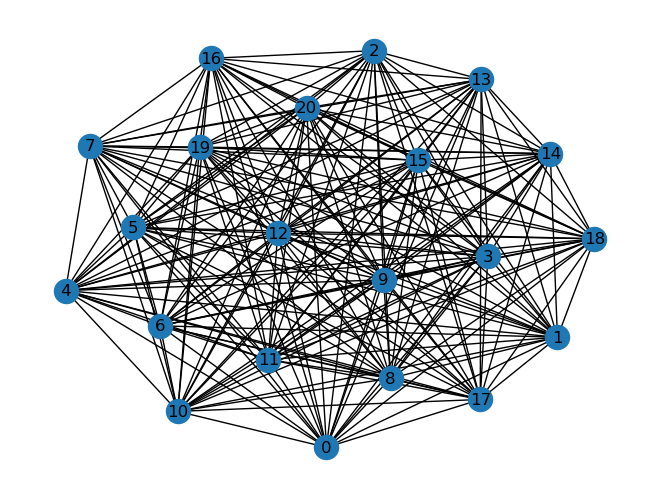

In [4]:
graph_data[-1][1].draw_graph()

In [5]:
graph_data = graph_data[:3]

In [6]:
cur_dir = os.getcwd()

In [7]:
cur_dir = f'{os.getcwd()}/solver/'
base_dir = f'{cur_dir}/solved_lkh_{SEED}'

# Directory where lkh will write random intermediate states it needs
lkh_cache_dir = f'{base_dir}/lkh'

# Path to LKH executable, look at /LKH-3.0.6/README
executable_path = f'{cur_dir}/LKH-3.0.6/LKH'

lkh3_b = BaselineLKH3(lkh_cache_dir, graph_data[:3], executable_path)

This class was written and tested for Unix systems only
Creating directory  /Users/roberto/Desktop/stanford/cs224w/milestone1/cs224w/solver//solved_lkh_125/lkh
Loading validation dataset


In [8]:
def run_lkh_and_save_sols():
  lkh3_b.create_lkh_data()
  lkh3_costs, lkh3_paths, lkh3_duration = lkh3_b.run_lkh3()
  format_and_save(graph_data[:3], lkh3_costs, lkh3_paths, base_dir)

In [9]:
run_lkh_and_save_sols()

Number of processed graphs: 0
LKH-3 data has been successfully created and saved into  /Users/roberto/Desktop/stanford/cs224w/milestone1/cs224w/solver//solved_lkh_125/lkh


 ... (more hidden) ...


In [10]:
graphs = pd.read_pickle(f'{base_dir}/graphs_solved.pkl')

In [11]:
"""
graphs[i][0] -> graph
graphs[i][1] -> solution
"""
graphs[0]

([[0.2840656947358703, 0.6584529246736097],
  [[0.989522748350259, 0.6442514219650061],
   [0.30310127858355074, 0.14139534536259213],
   [0.48809945420972045, 0.16741758610405943],
   [0.27710607809830223, 0.0979822971514337],
   [0.9304149025112907, 0.48687835548248526],
   [0.7206884589172685, 0.19227314884745006],
   [0.21003226267177355, 0.24459837442297117],
   [0.17519978032457872, 0.3671296554168445],
   [0.9817632271577538, 0.28586453498929176],
   [0.9795898385852042, 0.924292225428429],
   [0.631067153791332, 0.11923773362509449],
   [0.8558422388809054, 0.7826232552109854],
   [0.8159078431707419, 0.5756240078364628],
   [0.0375979671541149, 0.5328833741700755],
   [0.3465766230101699, 0.32928045494939573],
   [0.6067943268933316, 0.8259320267238617],
   [0.27302094711264135, 0.5033403417758961],
   [0.8285680162611235, 0.4297915271138404],
   [0.4916651299733146, 0.7525309516885211],
   [0.7809700682181605, 0.5241475705783089]],
  [9, 4, 9, 3, 9, 6, 7, 9, 3, 7, 4, 5, 7, 1,